In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
# Convert to DataFrame for easy manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

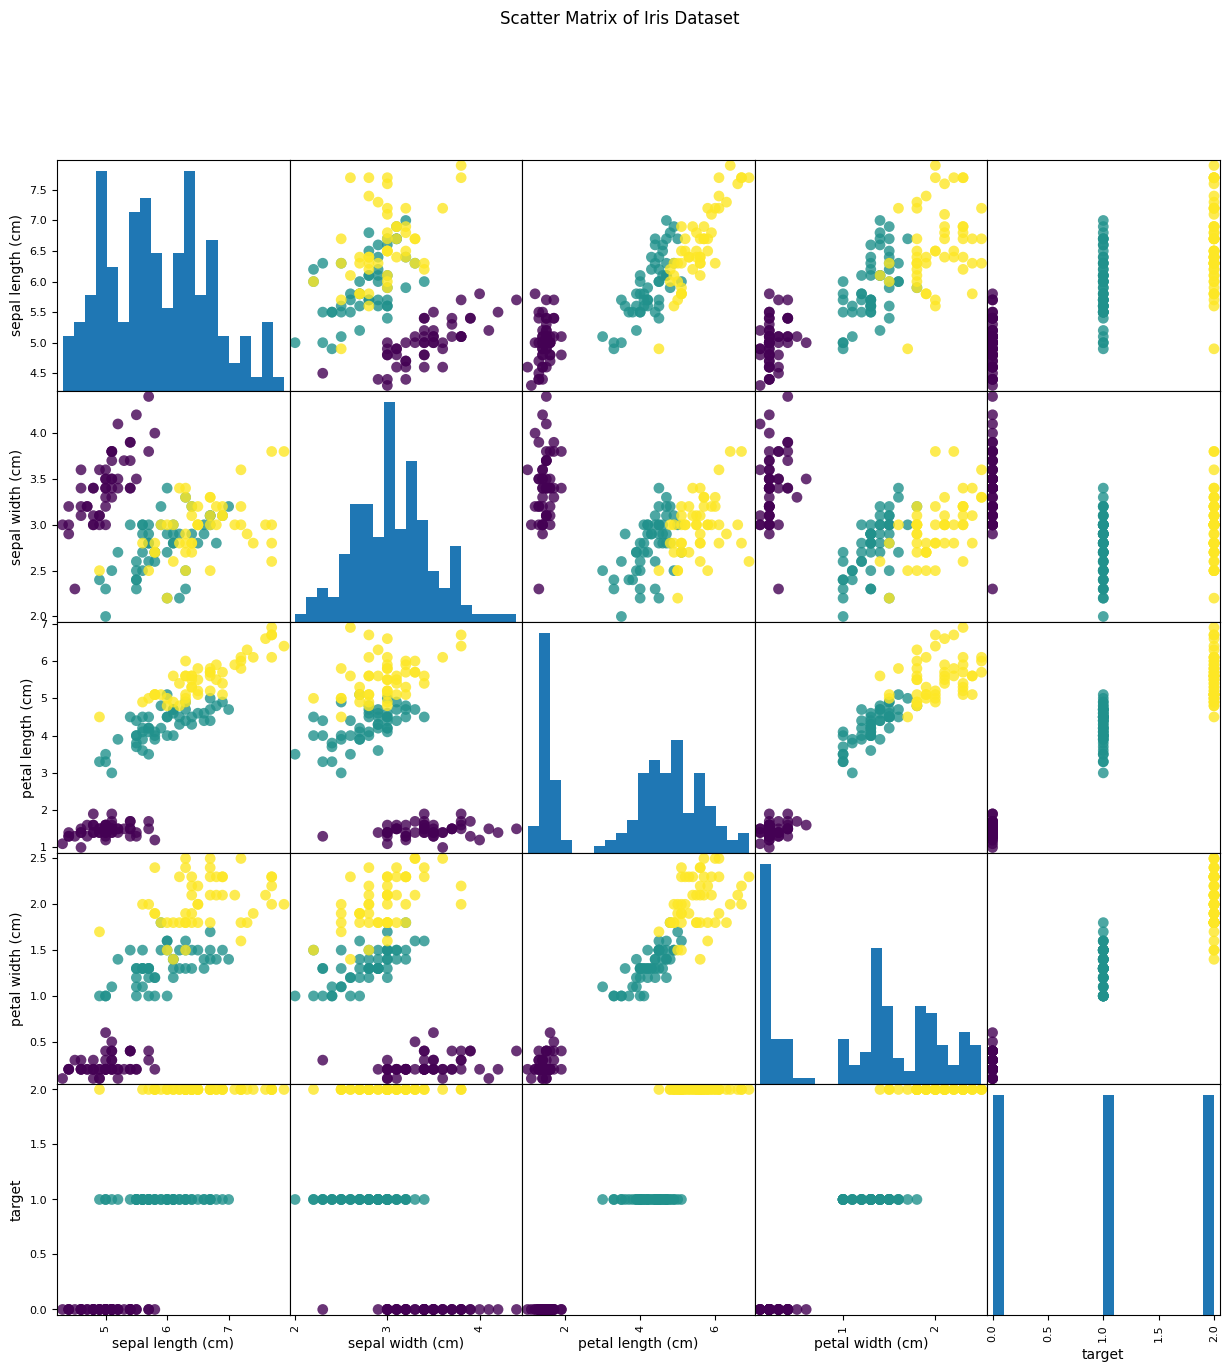

In [4]:
# Visualize the dataset with a pair plot
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.suptitle("Scatter Matrix of Iris Dataset")
plt.show()

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [7]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

In [8]:
# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [9]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# Visualize the decision boundaries using PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [12]:
# Train SVM on the 2D PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_classifier_pca = SVC(kernel='linear', random_state=42)
svm_classifier_pca.fit(X_train_pca, y_train_pca)

SVC(kernel='linear', random_state=42)

In [13]:
# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


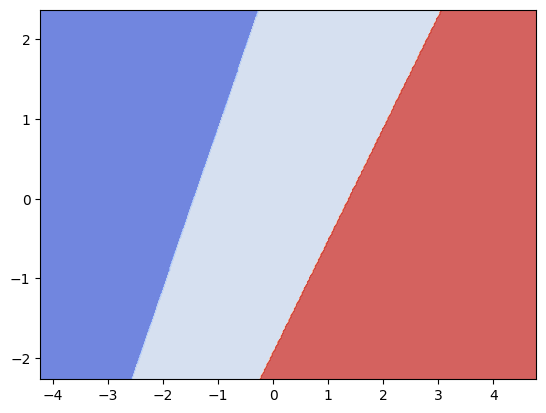

In [14]:
# Plot decision boundaries
Z = svm_classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

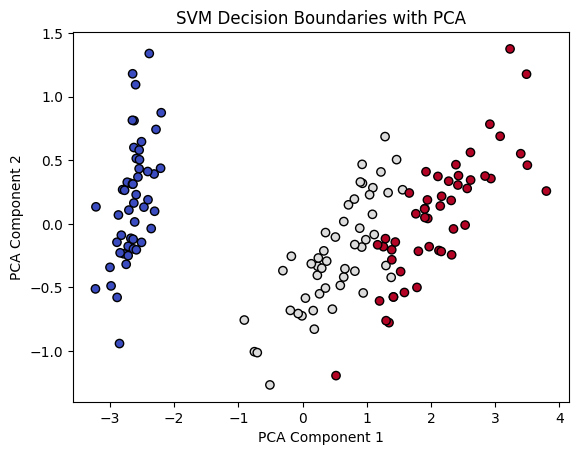

In [15]:
# Plot the training points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundaries with PCA')
plt.legend(handles=scatter.legend_elements()[0], labels=target_names)
plt.show()